<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/500s90f6t1g0_01py1_y2_y3(tpot2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=fe3f54d03a7ead1c7e18498314cbae3e2b99d8d93aae9b843e4b0e14db4caa7d
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s90f6t1g0.01py1-y2-y3.csv to 500s90f6t1g0.01py1-y2-y3.csv


In [3]:
df = pd.read_csv("500s90f6t1g0.01py1-y2-y3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
    'Y4',
    'Y5',
    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,0.085843,0.753476,0.213554,0.196049,0.731935,0.343040,0.177985,0.663207,0.900712,0.279806,...,0.558781,0.237225,0.223755,0.172613,0.497892,0.786377,0.432315,0.600591,0.722233,0.585107
1,0.835540,0.985722,0.077449,0.337546,0.170692,0.944404,0.711554,0.949196,0.000155,0.545354,...,0.358387,0.997078,0.729005,0.369669,0.590940,0.518110,0.155361,0.071758,0.639266,0.107305
2,0.734152,0.572629,0.543716,0.529769,0.616979,0.654185,0.006759,0.999891,0.910248,0.015888,...,0.079718,0.138566,0.688619,0.244016,0.439377,0.794725,0.495879,0.552234,0.284499,0.713774
3,0.464922,0.013080,0.761948,0.229393,0.864959,0.340662,0.561569,0.684506,0.995755,0.046017,...,0.499720,0.422352,0.581273,0.571285,0.012142,0.115609,0.431592,0.318387,0.052552,0.996278
4,0.239653,0.347019,0.313411,0.323217,0.743751,0.013036,0.021239,0.559386,0.702265,0.339479,...,0.248257,0.417728,0.953218,0.032362,0.757385,0.747439,0.989255,0.978840,0.401147,0.837396


In [4]:
y.head()

,Y1,Y2,Y3,Y4,Y5,Y6
0,0.463342,0.329358,0.511078,0.411171,0.527511,0.361748
1,0.416899,0.466401,0.376562,0.781561,0.239997,0.547058
2,0.663907,0.433949,0.307662,0.458674,0.566629,0.269518
3,0.498606,0.192859,0.475488,0.736733,0.586787,0.478791
4,0.761050,0.443890,0.395349,0.223771,0.300497,0.379338


In [6]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))


#from sklearn.decomposition import PCA, KernelPCA
#pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
#X_train = pca.fit_transform(X_train)
# transform features of the test set
#X_test = pca.transform(X_test)

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.5793779268475119

In [7]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.11017981715786718
MAE for morrfr is 0.08594889055768067


In [8]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.000742820910009798

Generation 2 - Current best internal CV score: -0.000742820910009798

Generation 3 - Current best internal CV score: -0.000742820910009798

Generation 4 - Current best internal CV score: -0.0007383431917837046

Generation 5 - Current best internal CV score: -0.0007383431917837046

Best pipeline: LassoLarsCV(LassoLarsCV(input_matrix, normalize=True), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00021748945214431623

Generation 2 - Current best internal CV score: -0.00021748945214431623

Generation 3 - Current best internal CV score: -0.00021748945214431623

Generation 4 - Current best internal CV score: -0.00021748945214431623

Generation 5 - Current best internal CV score: -0.00021748945214431623

Best pipeline: ElasticNetCV(LassoLarsCV(input_matrix, normalize=True), l1_ratio=0.2, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0010536530733056978

Generation 2 - Current best internal CV score: -0.0010530186309184854

Generation 3 - Current best internal CV score: -0.0010476633267322733

Generation 4 - Current best internal CV score: -0.0010476633267322733

Generation 5 - Current best internal CV score: -0.0010333266996746316

Best pipeline: LassoLarsCV(LassoLarsCV(input_matrix, normalize=False), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -9.829035809893775e-05

Generation 2 - Current best internal CV score: -9.821329314429851e-05

Generation 3 - Current best internal CV score: -9.74673659156941e-05

Generation 4 - Current best internal CV score: -9.74673659156941e-05

Generation 5 - Current best internal CV score: -9.74673659156941e-05

Best pipeline: LassoLarsCV(ElasticNetCV(input_matrix, l1_ratio=0.9500000000000001, tol=1e-05), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0018236949050047407

Generation 2 - Current best internal CV score: -0.0018102011227398116

Generation 3 - Current best internal CV score: -0.0018084054297794708

Generation 4 - Current best internal CV score: -0.0018084054297794708

Generation 5 - Current best internal CV score: -0.0018084054297794708

Best pipeline: ElasticNetCV(RobustScaler(LassoLarsCV(input_matrix, normalize=True)), l1_ratio=1.0, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00028585789782733644

Generation 2 - Current best internal CV score: -0.0002817919677011555

Generation 3 - Current best internal CV score: -0.0002817919677011555

Generation 4 - Current best internal CV score: -0.0002817919677011555

Generation 5 - Current best internal CV score: -0.0002817919677011555

Best pipeline: LassoLarsCV(LassoLarsCV(input_matrix, normalize=True), normalize=True)
RMSE for TPOT-MO is 0.11017981715786718
MAE for TPOT-MO is 0.08594889055768067


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitt

0.9808560523042745

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.9830676550319474

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.022734478801217387
MAE for morlsvr is 0.0019497111939286195


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.000744968261616525

Generation 2 - Current best internal CV score: -0.000744968261616525

Generation 3 - Current best internal CV score: -0.000744968261616525

Generation 4 - Current best internal CV score: -0.0007443402559921187

Generation 5 - Current best internal CV score: -0.0007323875409878976

Best pipeline: ElasticNetCV(SelectFwe(LassoLarsCV(input_matrix, normalize=False), alpha=0.022), l1_ratio=0.65, tol=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00015309059421428575

Generation 2 - Current best internal CV score: -0.00015054450180978504

Generation 3 - Current best internal CV score: -0.00015054450180978504

Generation 4 - Current best internal CV score: -0.00015054450180978504

Generation 5 - Current best internal CV score: -0.00014984967729313078

Best pipeline: LassoLarsCV(SGDRegressor(input_matrix, alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.5, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet, power_t=50.0), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0010537414920695023

Generation 2 - Current best internal CV score: -0.0010537414920695023

Generation 3 - Current best internal CV score: -0.0010328204191060778

Generation 4 - Current best internal CV score: -0.0010328204191060778

Generation 5 - Current best internal CV score: -0.0010328204191060778

Best pipeline: LassoLarsCV(ElasticNetCV(ZeroCount(input_matrix), l1_ratio=0.8, tol=1e-05), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.7609314301322107e-05

Generation 2 - Current best internal CV score: -1.7609314301322107e-05

Generation 3 - Current best internal CV score: -1.7609314301322107e-05

Generation 4 - Current best internal CV score: -1.7609314301322107e-05

Generation 5 - Current best internal CV score: -1.7008851126121273e-05

Best pipeline: ElasticNetCV(FastICA(input_matrix, tol=0.0), l1_ratio=0.9500000000000001, tol=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0004446205086652456

Generation 2 - Current best internal CV score: -0.0004446205086652456

Generation 3 - Current best internal CV score: -0.0004446205086652456

Generation 4 - Current best internal CV score: -0.0004446205086652456

Generation 5 - Current best internal CV score: -0.0004446205086652456

Best pipeline: LassoLarsCV(input_matrix, normalize=False)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0001940924384681531

Generation 2 - Current best internal CV score: -0.00019241696334845452

Generation 3 - Current best internal CV score: -0.00019241696334845452

Generation 4 - Current best internal CV score: -0.00019241696334845452

Generation 5 - Current best internal CV score: -0.0001920755813867034

Best pipeline: RidgeCV(GradientBoostingRegressor(ZeroCount(KNeighborsRegressor(input_matrix, n_neighbors=36, p=1, weights=uniform)), alpha=0.75, learning_rate=0.1, loss=ls, max_depth=1, max_features=0.4, min_samples_leaf=7, min_samples_split=13, n_estimators=100, subsample=0.2))


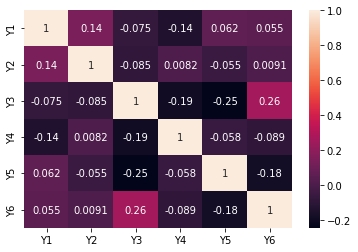

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:6]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

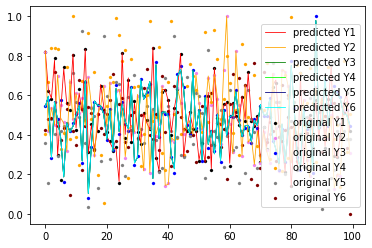

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.035917
Y2    0.008365
Y3    0.022345
Y4    0.020080
Y5    0.034550
Y6    0.008701
dtype: float64
arrmse:  0.021659622897869095
Mean absolute error :  0.009799875855091717
R2:  0.9804195960693355
RMSE for Ypred2 is 0.024262154631103067
